<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/AprendizajePorRefuerzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración de Python

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

#  Introducción a OpenAI gym

Se utilizará [OpenAI gym](https://gym.openai.com/), como paquete básico para la simulación de ambientes/entornes orientados al entrenameinto de algoritmos de Aprendizaje por Refuerzo.

In [2]:
import gym
gym.envs.registry.all() #entornos disponibles

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

- El Cart-Pole es un escenario de simulación simple que permite movilizar a izquierda a derecha un carro con mastil.

- El agente debe mover el carro con el fin de mantener el mastil en vertical.

In [3]:
env = gym.make('CartPole-v1') #creamos el ambiente cartpole

Se inicializa el escenario:

In [4]:
env.seed(42)
obs = env.reset()#retorna una observación

- La observación varia según el escenario.
- En este caso es un numpy array con cuatro floats: posición horizontal, velocidad, ángulo del mastil (0 = vertical), y velocidad angular.

In [5]:
print(obs)

[-0.01258566 -0.00156614  0.04207708 -0.00180545]


-Un escenario puede ser vizualizado mediante el método `render()`.

**Warning**: algunos escanrios acceden a la pantalla para realizar el render, generando una nueva ventana. Para evitar problemas con el manejo de la pantalla en Jupyter o .ipynb se instala un servidor falso [Xvfb](http://en.wikipedia.org/wiki/Xvfb). 

In [6]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [7]:
display

In [8]:
env.render() # metodo render

True

Se activa el `mode="rgb_array"` para obtener una imagen del escenario como array de numpy:

In [9]:
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

In [10]:
def plot_environment(env, figsize=(5,4)):#funcion para graficar escenario como imagen rgb
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

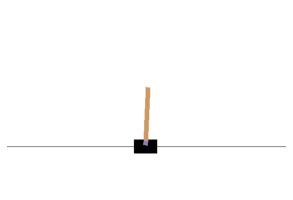

In [11]:
plot_environment(env)
plt.show()

- Cómo interactuar con el escenario?
-El agente debe escoger una acción del "action space"

In [12]:
env.action_space

Discrete(2)

Acciones disponibles: acelerar a izquierda o derecha

In [13]:
action = 1  # accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

- El carro se mueve a derecha (obs[1] > 0). 
-El mastil esta hacia la derecha (obs[2] > 0).
- Velocidad angular es negativa (obs[3] < 0).
- El mastil debe moverse a izquierda en el siguiente paso.

Saving figure cart_pole_plot


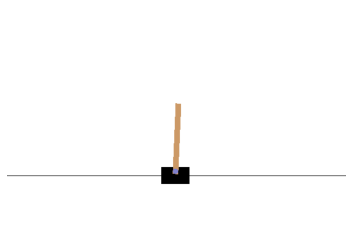

In [14]:
plot_environment(env)
save_fig("cart_pole_plot")

- El escenario también informa sobre la recompensa obtenida en el última paso:

In [15]:
reward

1.0

- Si el juego termina:

In [16]:
done

False

- `info` es un diccionario que provee información específica del escanario, por ejemplo: vidas restantes

In [17]:
info

{}

- La secuencia de pasos en el escenario desde el reset hasta done=True se conoce como "episode". 
- Al final de un (i.e., cuando `step()` retorna `done=True`), se debe resetear el escenario.

In [18]:
if done:
    obs = env.reset()

- Se necesita de una _policy_ para que el agente realice bien su trabajo. 

- Policy se refiere a la estrategia que seguira el agente para seleccionar una acción en cada paso.

- Puede tener en cuenta los pasos y acciones del pasado para decidir qué hacer!

# Policy simple

- Si el mastil se inclina a izquierda, empuja hacia la izquierda, y  _vice versa_. 

In [19]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [20]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.718, 8.858356280936096, 24.0, 68.0)

- Logró mantenerse vertical por 68 pasos! 
- El escenario es considerado exitoso para esta tarea si logra mantenerse al menos para 200 pasos.

In [21]:
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [22]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [23]:
plot_animation(frames)

# Neural Network Policies

- Se creará una red neuronal que obtendrá las observaciones como entrada y
estimará en la salida las probabilidades de las acciones a tomar por cada entrada (observación).

- Para escoger una acción, la red estimará la probabilidad de cada acción, y seleccionará la acción de forma aleatoria con base a las probabilidades estimadas.

- Para este caso del Cart-Pole, hay solo dos posibles acciones (izquierda y derecha), por ende solo se requiere una neurona de salida.

- La neurona estimará la probabilidad `p` para la acción izquierda (0) y `1 - p` será derecha (1)

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0] #espacio de observaciones en cart-pole

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

- En este caso las acciones del pasado se pueden ignorar dado que el espacio de observaciones contiene la información completa del estado del ambiente (estado completo).

- Si se necesitaran hidden states (estados ocultos) se requerirían acciones y observaciones del pasado para inferir dichos estados ocultos del escenario. 

- **Ejemplo**: si el ambiente solo revelara la posición de  cart pero no su velocidad, deberian considerarse observaciones previas para inferir dicha variable. (Si el ambiente fuera ruidoso seria conveniente tener información del pasado).

**NOTA:** Se escoge una acción con base a las probabilidades estimadas para que el agente encuentre un balance entre _exploring_ nuevas acciones y _exploiting_ las acciones que se saben son buenas.

## Modelo no entrenado - aleatorio

In [25]:
def render_policy_net(model, n_max_steps=200, seed=42): 
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

In [26]:
frames = render_policy_net(model)
plot_animation(frames)

- La red jugará en 50 diferentes escenarios en paralelo (ofrece una variedad de lotes de entrenamiento en cada paso), y se entrena para 5000 iteraciones.

- Se deben resetear los ambientes una vez se termine cada escenario (done True en el vector de observaciones).

- Se entrena el modelo con un lazo custom.

In [27]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)] # crear lista de escenarios
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy #funcion de costo tipo clasificacion

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations]) # acciones "ideales"
    with tf.GradientTape() as tape: #gradiente automatico
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.094

In [28]:
frames = render_policy_net(model)
plot_animation(frames)

- La estrategia fue aprendida por la red.

- Podrán generarse mejores estrategias por la propia red?

# Policy Gradients

- Para entrenar esta red se requieren definir las probabilidades objetivo `y`. 

- Si una acción es buena, deberiamos incrementar su  probabilidad, si es mala reducirla.

- Cómo saber si es buena o mala?, algunas acciones pueden tener efectos retardados, dado que cuando se ganan o pierden puntos no se sabe de forma clara que acciones contribuyeron  (the _credit assignment problem_).

- _Policy Gradients_ juega múltiples episodios y luego toma acciones de episiodios como más probables, mientras que acciones de malos episiodios como poco probables.

- **Jugamos primero y luego revisamos que funcionó**

- Creamos una función para jugar.

- Se asume que la acción correcta es la derecha (1).

- Se calcula el costo y sus gradientes (se guardarán y luego se modifican dependiendo de que tan buena o mala resultó la acción).

In [29]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

- Si `left_proba` es alta, `action` tenderá  a `False`. 
- Si se obtiene `False` significa 0 en el casteo a flotante, `y_target` será 1 - 0 = 1. 
- Fijamos el objetivo a 1, pretendiendo que la probabilidad de ir a izquierda debería ser 100%.

Se crea una función que desde `play_one_step()` juega múltiples episodios, retornando los rewards y gradients:

In [30]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

- El algritmo Policy Gradients utiliza el modelo para jugar varias veces un episodio (e.g., 10 tiempos), y luego revisará las rewards y normaliza. 

- Se construye una función para descontar rewards y otra para normalizar rewards a lo largo de muchos episodios.

In [31]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1): #acumular descuentos de fin a inicio
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std #normalizacion zscore
            for discounted_rewards in all_discounted_rewards]

- **Por  ejemplo**: si tenemos 3 acciones, y después de cada acción se obtiene un reward: 10 en la primera, 0 en al  segunda, y -50 en la tercera. 

- Si se utiliza un factor de descuento de 80%, en la 3rd acción se obtendrá -50 (full credit for the last reward), pero en la segunda solo -40 (80% credit del último reward), y para la 1st action obtendrá el 80% de -40 (-32) más crédito completo del primer reward (+10), lo cual conlleva a un descuento de reward de -22:

In [32]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

- Para normalizar todos los descuentos de rewards sobre los episodios, se cálcula la media y desviación estandar de todos los discounted rewards y se normaliza por zscore:

In [33]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [34]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

In [35]:
optimizer = keras.optimizers.Adam(lr=0.01)
loss_fn = keras.losses.binary_crossentropy

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [37]:
env = gym.make("CartPole-v1")
env.seed(42);


for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    print("\rIteration: {}, mean rewards: {:.1f}".format(          # Not shown
        iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 149, mean rewards: 192.0

In [38]:
frames = render_policy_net(model)
plot_animation(frames)

# Procesos de Decisión de Markov

-- **Markov chains**: proceso estocástico sin memoría, con número finito de estados que evoluciona de forma aleatoria de un estado a otro.

-- La probabilidad de pasar de un estado $s$ a $s'$ es fija, y depende solo del par ($s$,$s'$), no de estados pasados.

-- **Markov Decision Processes (Procesos de decisión de Markov) - MDP**: En cada estado el agente puede escoger una de varias acciones y las probabilidades de transición dependen de la acción escogida.

-- Los MDP también pueden incluir transición de estados que involucren rewards (positivos o negativos).

-- Se busca que un agente en un MDP máximice el reward en el tiempo con base a una policy.


- Simulación de una secuencia de longitud fija dado una matriz de transición

In [39]:
def MC_evolve(A,T=10):
  #T number of step to evolve
  M = A.shape[0] #Number of states
  s = np.argmax(np.random.multinomial(1, np.ones(M)/M))
  seq = [s]
  for t in range(T-1):
    s = np.argmax(np.random.multinomial(1, A[s,:]))
    seq.append(s)
  
  return seq

In [40]:
A = np.array([[0.7 ,0.2 ,0   ,0.1],
              [0   ,0   ,0.9 ,0.1],
              [0   ,1.0 ,0   ,0],
              [0   ,0   ,0   ,1]])

print('State transition matrix')
print(A)

print('MC sequence:')
MC_evolve(A,5)

State transition matrix
[[0.7 0.2 0.  0.1]
 [0.  0.  0.9 0.1]
 [0.  1.  0.  0. ]
 [0.  0.  0.  1. ]]
MC sequence:


[3, 3, 3, 3, 3]

-- Simulación de una secuencia estado-acción de longitud finita dado un proceso de decisión de Markov, asumiendo que todas las acciones son igualmente probables (no hay sesgo de estrategia - policy).

In [41]:
def MDP_evolve(MDP,T=10):
  #T number of step to evolve
  N = len(MDP['A']) #Number of states
  
  #Initial state:
  s = np.argmax(np.random.multinomial(1, np.ones(N)/N))  

  seq = []
  
  for t in range(T-1):
    #Choose an action:
    a_s = MDP['a'][s] #Possible actions
    Na = len(a_s)     #Number of possible actions
    index = np.argmax(np.random.multinomial(1, np.ones(Na)/Na)) #All actions are equally probable
    a = MDP['a'][s][index] #Chosen action

    #Sample the next state:
    s_next = np.argmax(np.random.multinomial(1, MDP['A'][s][a]))  

    #Claim the reward:
    reward = MDP['R'][s][a][s_next]

    #Append to the list:
    seq.append([s,a,reward])
    
    s = s_next

  return np.array(seq)

-- Se definen algunas probabilidades de transición, rewards y acciones.
Let's define some transition probabilities, rewards and possible actions. 

-- **Por ejemplo**:
- En el estado s0, si la acción escogida es a0 con probabilidadis 0.7 se ira a estado s0 con reward +10. 
- Con probabilidad 0.3 se ira a estado s1 sin reward, y nunca se alcanzará el estado s2 
- Probabilidades de transición:  `[0.7, 0.3, 0.0]`.
- Rewards `[+10, 0, 0]`

Transition probabilities: 0.8
Rewards: 10
Possible actions:
State 0: [0, 1, 2]
State 1: [0, 2]
State 2: [1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


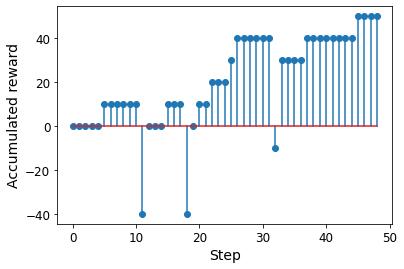

[0 2 0]


In [42]:
transition_probabilities = [ # shape=[s, a, s']
[[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
[[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
[None, [0.8, 0.1, 0.1], None]]

rewards = [ # shape=[s, a, s']
[[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
[[0, 0, 0], [0, 0, 0], [0, 0, -50]],
[[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]

possible_actions = [[0, 1, 2], [0, 2], [1]]

MDP = {'A':transition_probabilities,'R':rewards,'a':possible_actions}

print('Transition probabilities:',MDP['A'][0][2][0])
print('Rewards:',MDP['R'][0][0][0])
print('Possible actions:')
for state,actions in enumerate(MDP['a']):
  print('State {}:'.format(state),actions)


seq = MDP_evolve(MDP,T=50)

plt.stem(np.cumsum(seq[:,2]))
plt.xlabel('Step')
plt.ylabel('Accumulated reward')
plt.show()

print(seq[0])

## Algoritmo Q-Value iterativo:

-- **Ecuación de Bellman**: en un MDP algunos estados incluyen acciones para las que no es claro que acción generará mejores rewards a lo largo del tiempo.

-- Bellman encontró una estimación del valor óptimo de estado para cualquier estado $s$, como la suma de todos los discounted rewards futuros que el agente espera en promedio después de alcanzar un estado $s$, asumiendo que actua de forma óptima.

-- Si el agente actua de forma óptima, la Bellman Optimality equation aplica según:

$$V^*(s)= \max_a \sum_s T(s,a,s')\left(R(s,a,s')+\gamma V^*(s')\right); \quad \forall s$$

- $V^*(s):$ Valor óptimo estimado para el estado $s$.

- $T(s,a,s')$: probabilidad de transición de estado $s$ a estado $s'$ mediante acción $a$.

- $R(s,a,s')$: reward del agente al pasar de estado $s$ a $s'$ mediante acción $a$.

- $\gamma:$ factor de descuento.

-- **Algoritmo Value iteration**: 

$$ V_{k+1}(s) \leftarrow \max_a  \sum_{s'} T(s,a,s')\left(R(s,a,s')+\gamma V_k^*(s')\right); \quad \forall s$$
 
 - $V_k(s):$ Valor óptimo estimado para el estado $s$ en la iteración $k$.
 - Conocer el valor óptimo del estado es útil para evaluar la policy, aunque NO provee la policy óptima del agente.
 -Bellman extendió el mismo concept para estimar los valores óptimos de estado-acción (Q-Values).

-- **Algoritmo Q-Value iteration**

 - $Q^*(s,a):$ par Q-Value de estado acción como la suma de rewards futuros descontados que el agente puede esperar en promedio después que alcanza el estado $s$ y escoge la acción $a$ pero antes de ver la salida de dicha acción, asumiendo que se desenvuelve de manera óptima después de la misma.


$$ Q_{k+1}(s,a) \leftarrow \sum_{s'} T(s,a,s')\left(R(s,a,s')+\gamma \max_{a'}Q_k(s',a')\right); \quad \forall (s',a)$$
 
- Los valores Q-value se inicializan en cero.

- Después de obtener los Q-Values óptimos, se definie la policy óptima como:

$$\pi^*(s)=\arg\max_a Q^*(s,a)$$



In [43]:
# definir probabilidades de transición, rewards y acciones  en el proceso de decisión de Markov

transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None]]
rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]]

In [44]:
Q_values = np.full((3, 3), -np.inf) # -np.inf para acciones no posibles
for state, actions in enumerate(possible_actions): #inicializar en 0
    Q_values[state, actions] = 0.0  # 

gamma = 0.90  # discount factor

history1 = [] 
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1)

Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

**Nota**:  Se observa que si el agente se encuentra en $s_0$ y escoge la acción $a_1$, el esperado de descuentos futuros (discounted rewards) es de 17.02 aprox.

In [45]:
np.argmax(Q_values, axis=1) # max por columnas para encontrar la mejor accion en cada state

array([0, 0, 1])

La policy óptima para este proceso de Markov es (discount factor en 0.9):

- $a_0$ en estado $s_0$
- $a_0$ en estado $s_1$
- $a_1$ en estado $s_2$ (única acción disponible)

Cambiando el discount factor a 0.95:

In [46]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [47]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [48]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [49]:
np.argmax(Q_values, axis=1)

array([0, 2, 1])

- Ahora en $s_1$ se escoge acción $a_2$.
- Si el discount factor es mas alto valorando más opciones futuras, y el agente esta dispuesto a pagar mas penalidades buscando rewards futuros (más arriesgado!).

# Temporal Difference Learning (Aprendizaje por diferencia temporal)

- En Reinforcement Learning los problemas con acciones discretas se modelan como procesos de decisión de Markov.

- Sin embargo, en general el agente NO tiene idea sobre las probabilidades de transición ($T(s,a,s')$ no se conoce).

- Tampoco se conocen los rewards que se van obteniendo ($R(s,a,s')$ no se conoce).

- Se debe experimentar sobre cada estado y cada transición al menos una vez para conocer los rewards, y se debe experimentar múltiples veces dicho proceso para tener un buen estimado de las probabilidades de transición.

- El algoritmo Temporal Difference Learning es similar al Value Iteration, pero se ajusta para cuando el agente solo tiene conocimiento parcial del proceso de decisión de Markov.

- Se asume que el agente conoce solo los posibles estados y acciones.

- El agente usa una `exploration policy`, i.e., policy aleatoria para explorar el proceso de decisión de Markov.

- El TD actualiza el estimado de los valores de estado utilizando las transiciones y rewards que se observan:

$$V_{k+1}(s)\leftarrow (1-\alpha)V_k(s)+\alpha(r +\gamma V_k(s'))$$

$$V_{k+1}(s)\leftarrow V_k(s)+\alpha \delta_k(s,r,s')$$

$\alpha$: learning rate
$r$: reward promedio

$\gamma:$ discount factor

$r+\gamma V_k(s'):$ TD target

$\delta_k(s,r,s')=r+\gamma V_k(s')-V_k(s):$ TD error


# Q-Learning

-- Es una adaptación del Q-Value Iteration para cuando las probabilidades de transición y los rewards no se conocen inicialmente.

-- Se observa al agente jugar, e.g., aleatoriamente, y se mejoran las estimaciones de Q-Value de forma gradual.

-- Una vez se conocen los Q-Value, la policy óptima se escoge desde la acción con Q-Value más alto, i.e., greedy policy.

$$Q(s,a) \leftarrow_\alpha r+\gamma \max_{a'}Q(s',a')$$

Nota: $a \leftarrow_\alpha b$ equivalente a $a_{k+1}\leftarrow (1-\alpha)a_k-\alpha b_k$

-- Para cada par estado-acción (s,a) el algoritmo monitorea el avance del promedio de rewards $r$ que el agente obtuvo hasta dejar el estado $s$ con la acción $a$.

-- Se simulará un agente moviéndose en el escenario, definiendo una función que efectue alguna acción y obtener el nuevo estado y un reward:

In [50]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

-- Se necesita una exploration policy, para visitar cada estado muchas veces.

-- Se empleará una policy aleatoria, dado que el espacio de estados es pequeño.

In [51]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

-- Ahora, se inicializará los Q-Values y se aplicará el Q-Learning algorithm:

In [52]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] 

for iteration in range(10000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2) 

Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [53]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1])

Saving figure q_value_plot


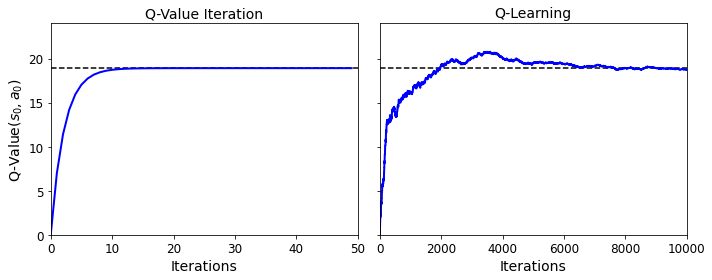

In [54]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

save_fig("q_value_plot")

-- El algoritmo Q-Learning converge al Q-Value óptimo, pero requiere de muchas iteraciones.

-- Se deben sintonizar varios hyperparámetros!

-- Q-Value iteration converge más rápido.

-- Sin embargo, Q-Learning no conoce las probabilidades de transición ni los rewards, lo que hace más díficil conocer la pocily óptima.

-- Q-Learning se conoce como off-policy dado que la policy ejecutada es no necesariamente la ejecutada-> la policy ejecutada es exploratoria (random), mientras que la entrenada será siempre escogida desde las acciones con los Q-Values más altos.

-- **Q-Learning aprende solo observando un agente actuando aleatoriamente**

-- Imagine aprender a jugar golf con un profesor tipo miquito borracho XD!

# Exploration policies

-- Q-Learning funciona si la exploration policy explora el MDP completamente.

-- Una policy totalmente aleatoria converge eventualmente pero requiere muchas iteraciones.

-- **$\epsilon$-greedy policy**: en cada paso el agente explora de forma aleatoria con probabilidad $\epsilon$, o greedy con probabilidad $1-\epsilon$ (escoger la acción con el Q-value más alto).

-- Se sugiere iniciar con un $\epsilon$ en 1 y se va reduciendo hasta 0.05.

-- **Q-Learning** usando función de exploración:


$$Q(s,a)\leftarrow_\alpha r + \gamma \max_{a'} f\left(Q(s',a'),N(s',a')\right) $$

- $N(s',a'):$ conteo de el número de veces que la acción $a'$ fue escogida en estado $s'$
- $f(Q,N):$ es una función de exploración, tal que: $f(Q,N)=Q + \kappa/(1+N),$ siendo $\kappa$ un hiperpárametro de curiosidad.

# Q-Learning aproximado y Deep Q-Learning

-- Q-Learning no es flexible para MDP grandes (NO ESCALABLE).

-- Ejemplo Ms. Pac-Man : 
 - 150  galletas (cada una puede estar disponible o no).
 - Posibles estados $2^{150} \approx 10^{45}$
 - Incluya todas las posibles combinaciones de posiciones de Pac-Man, fantasmas, galletas, **los posibles estados son inmanejables!**

-- **No es posible calcular todos los Q-Value**

-- **Solución:** Encontrar una aproximación (Approximate Q-Learning) $Q_\theta(s,a) \approx Q-Value$, con un número manejable de parámetros $\mathbf{\theta}.$

-- **Alternativa 1**: utilizar combinaciones lineales de características predefinidas, e.j., distancia entre Ms. Pac-Man y fantasmas, galletas, etc.

-- **Aleternativa 2**: Utilizar deep learning sin necesidad de imponer características predefinidas (Deep mind en 2013).

-- Deep learning para estimar Q-Value es llamado **Deep Q-Network--(DQN)**

-- Deep learning para aproximar Q-Learning es llamado **Deep Q-Learning--(DQN)**

-- Partiendo del principio de Bellman, se puede definir el Target Q-Value desde $Q_\theta$ como:

$$Q_{target}(s,a)= r + \gamma \max_{a'} Q_\theta(s',a')$$

$r$: reward

$\gamma$: factor de descuento

-- Con el Q target se puede implementar una estrategia de entrenamiento basada en *gradiente descendiente*.

-- En general se plantea el mse o Huber loss entre el Q-Value estimado y el Q-Value target.





*Implementación DQN: Dado un estado, se estimará por cada acción, la suma de rewards futuros descontados después de jugar dicha acción (sin conocer su salida)*:

In [55]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

-- Para escoger una acción  con DQN, se escoge la acción con el Q-value más grande. 

-- Sin embargo, para explorar, se selecciona una acción de forma aleatoria con probabilidad `epsilon`.


In [56]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

-- Se requiere un replay memory. 

-- El replay memory contiene las experiencias del agente en tuplas: `(obs, action, reward, next_obs, done)`. 

-- Se usará la `deque` class

In [57]:
from collections import deque

replay_memory = deque(maxlen=2000)

-- Se crea una función  para muestrear experiencias desde el replay memory. 

-- Retornará 5 NumPy arrays: `[obs, actions, rewards, next_obs, dones]`.

In [58]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

-- Se crea una función que usará DQN para jugar un paso y guardar la experiencia en el replay memory:

In [59]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

-- Se crea una función que muestra algunas experiencias del replay memory y se ejecuta un paso de entrenamiento:

In [60]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(lr=1e-2)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [61]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = [] 
best_score = 0

In [ ]:
for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) # Not shown in the book
    if step >= best_score: # Not shown
        best_weights = model.get_weights() # Not shown
        best_score = step # Not shown
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") # Not shown
    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

Episode: 418, Steps: 135, eps: 0.164

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [ ]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

**Tarea:**

Consultar los principios básicos de los siguientes algoritmos (modelo, extensión de Bellman, etc.) y comparar los resultados de aprendizaje por refuerzo anteriormmente obtenidos en CartPole:

-- Double DQN

-- Dueling Double DQN